In [89]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI4 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI4")
X_train = DKI4.index.values.reshape(-1, 1)
y_train = DKI4['PM10'].values.reshape(-1,)

gamma_value = 0.03
C_value=300

## Laplacian Kernel

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['PM10'].min()
max_par = DKI4['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.076
MSE: 0.006
MAE: 0.059
R-Squared: -0.137
       Tanggal       PM10
0   2022-11-30  31.377246
1   2022-12-01  31.137725
2   2022-12-02  31.137725
3   2022-12-03  30.898204
4   2022-12-04  30.778443
5   2022-12-05  30.778443
6   2022-12-06  30.538922
7   2022-12-07  30.419162
8   2022-12-08  30.419162
9   2022-12-09  29.940120
10  2022-12-10  29.940120
11  2022-12-11  29.461078
12  2022-12-12  29.461078
13  2022-12-13  29.341317
14  2022-12-14  29.341317
15  2022-12-15  29.221557
16  2022-12-16  29.221557
17  2022-12-17  28.862275
18  2022-12-18  28.862275
19  2022-12-19  28.742515
20  2022-12-20  28.742515
21  2022-12-21  28.742515
22  2022-12-22  28.263473
23  2022-12-23  28.263473
24  2022-12-24  28.263473
25  2022-12-25  28.263473
26  2022-12-26  28.143713
27  2022-12-27  28.143713
28  2022-12-28  28.143713
29  2022-12-29  28.143713


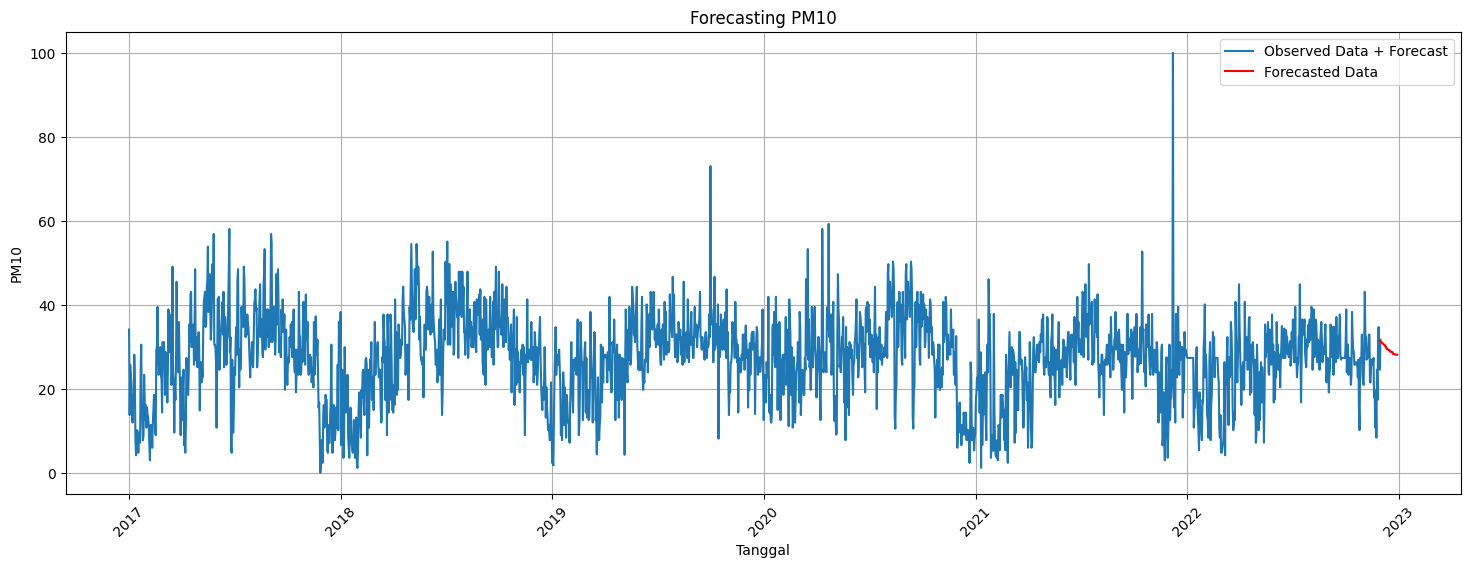

In [91]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## RBF Kernel

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['PM10'].min()
max_par = DKI4['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.093
MSE: 0.009
MAE: 0.073
R-Squared: -0.719
       Tanggal       PM10
0   2022-11-30  31.736527
1   2022-12-01  35.089820
2   2022-12-02  40.119760
3   2022-12-03  45.508982
4   2022-12-04  47.904192
5   2022-12-05  47.305389
6   2022-12-06  44.311377
7   2022-12-07  38.323353
8   2022-12-08  34.251497
9   2022-12-09  31.736527
10  2022-12-10  29.461078
11  2022-12-11  28.143713
12  2022-12-12  27.664671
13  2022-12-13  27.544910
14  2022-12-14  27.544910
15  2022-12-15  27.544910
16  2022-12-16  27.544910
17  2022-12-17  27.544910
18  2022-12-18  27.544910
19  2022-12-19  27.544910
20  2022-12-20  27.544910
21  2022-12-21  27.544910
22  2022-12-22  27.544910
23  2022-12-23  27.544910
24  2022-12-24  27.544910
25  2022-12-25  27.544910
26  2022-12-26  27.544910
27  2022-12-27  27.544910
28  2022-12-28  27.544910
29  2022-12-29  27.544910


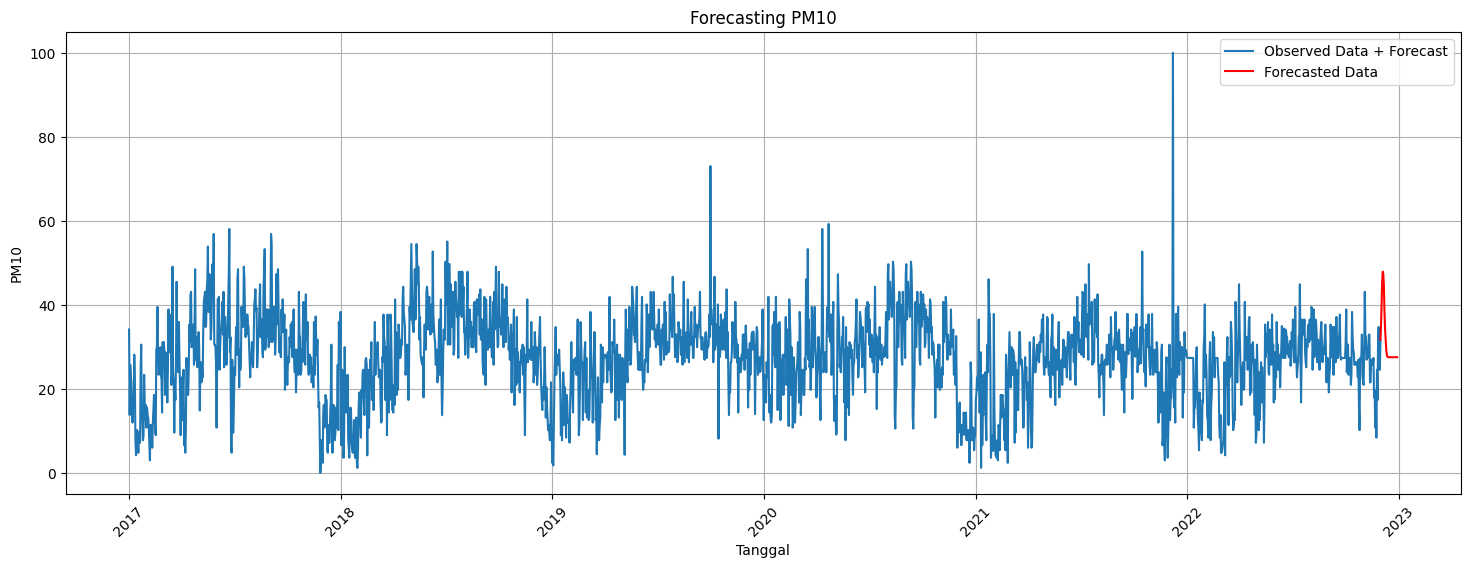

In [93]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Linear

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['PM10'].min()
max_par = DKI4['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.099
MSE: 0.010
MAE: 0.077
R-Squared: -0.933
       Tanggal       PM10
0   2022-11-30  32.814371
1   2022-12-01  32.814371
2   2022-12-02  32.814371
3   2022-12-03  32.814371
4   2022-12-04  32.814371
5   2022-12-05  32.814371
6   2022-12-06  32.814371
7   2022-12-07  32.814371
8   2022-12-08  32.814371
9   2022-12-09  32.814371
10  2022-12-10  32.814371
11  2022-12-11  32.814371
12  2022-12-12  32.814371
13  2022-12-13  32.814371
14  2022-12-14  32.934132
15  2022-12-15  32.934132
16  2022-12-16  32.934132
17  2022-12-17  32.934132
18  2022-12-18  32.934132
19  2022-12-19  32.934132
20  2022-12-20  32.934132
21  2022-12-21  32.934132
22  2022-12-22  32.934132
23  2022-12-23  32.934132
24  2022-12-24  32.934132
25  2022-12-25  32.934132
26  2022-12-26  32.934132
27  2022-12-27  32.934132
28  2022-12-28  32.934132
29  2022-12-29  32.934132


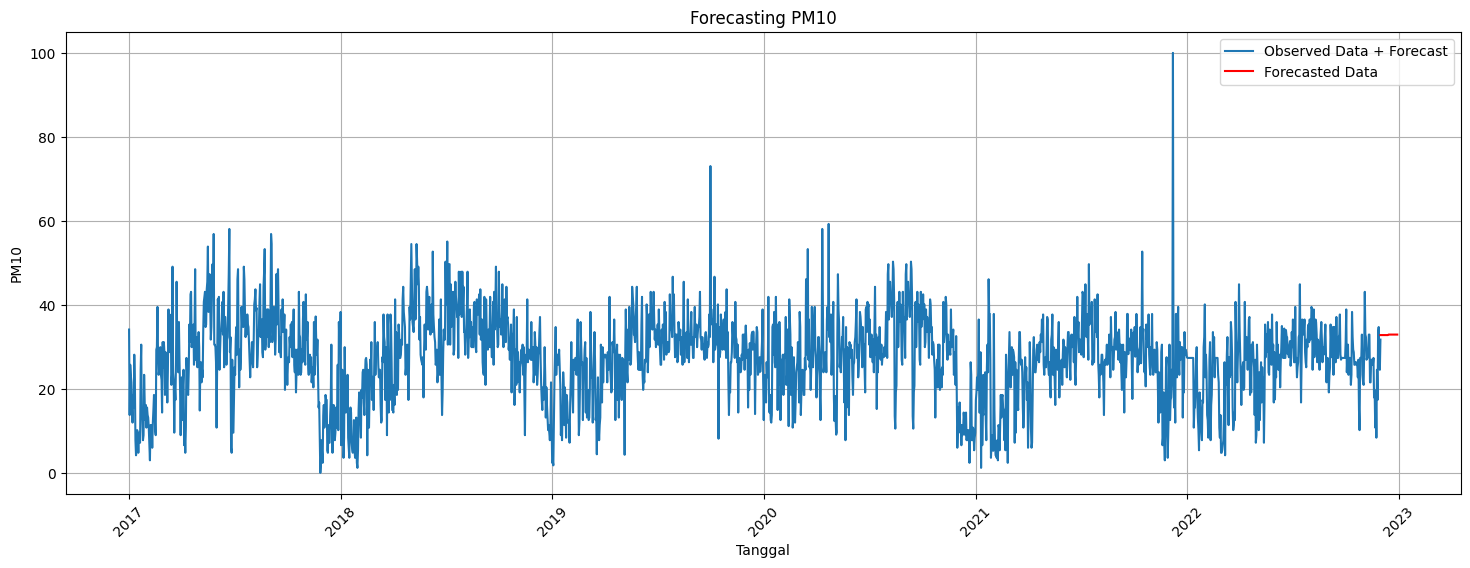

In [95]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Sigmoid

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['PM10'].min()
max_par = DKI4['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.079
MSE: 0.006
MAE: 0.060
R-Squared: -0.233
       Tanggal       PM10
0   2022-11-30  29.461078
1   2022-12-01  29.461078
2   2022-12-02  29.461078
3   2022-12-03  29.461078
4   2022-12-04  29.461078
5   2022-12-05  29.461078
6   2022-12-06  29.461078
7   2022-12-07  29.461078
8   2022-12-08  29.461078
9   2022-12-09  29.461078
10  2022-12-10  29.461078
11  2022-12-11  29.461078
12  2022-12-12  29.461078
13  2022-12-13  29.461078
14  2022-12-14  29.461078
15  2022-12-15  29.461078
16  2022-12-16  29.461078
17  2022-12-17  29.461078
18  2022-12-18  29.461078
19  2022-12-19  29.461078
20  2022-12-20  29.461078
21  2022-12-21  29.461078
22  2022-12-22  29.461078
23  2022-12-23  29.461078
24  2022-12-24  29.461078
25  2022-12-25  29.461078
26  2022-12-26  29.461078
27  2022-12-27  29.461078
28  2022-12-28  29.461078
29  2022-12-29  29.461078


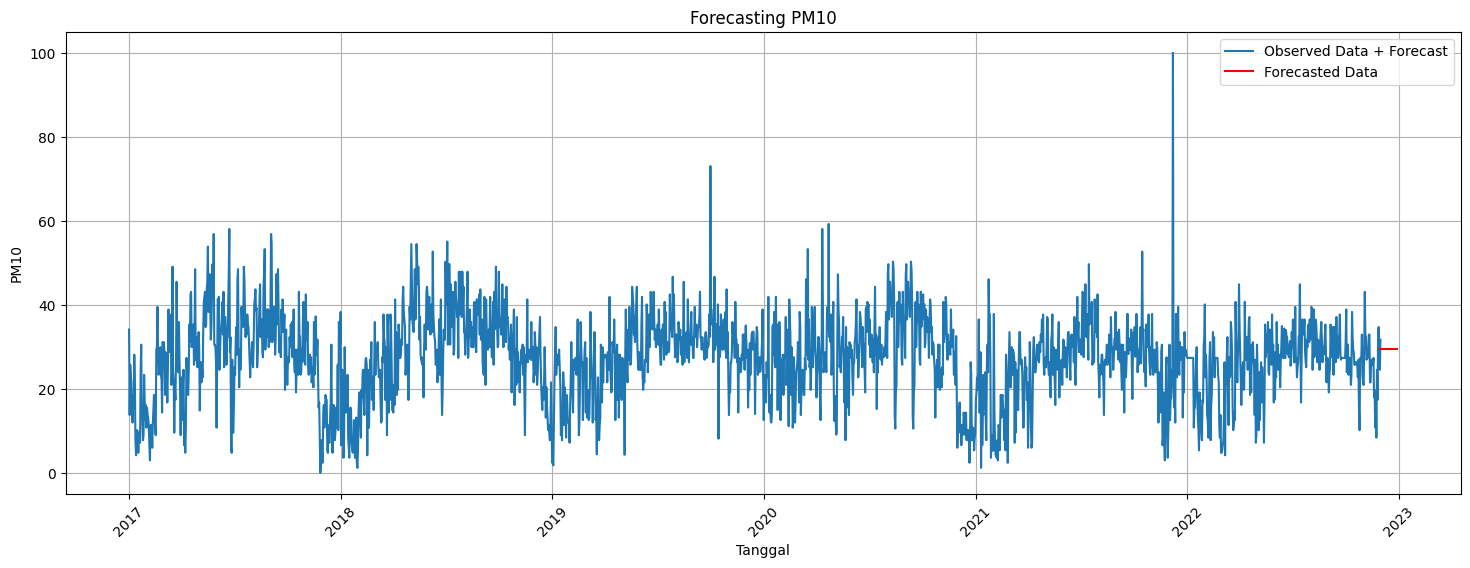

In [97]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Cosine

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI4['PM10'].min()
max_par = DKI4['PM10'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'PM10': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI4['PM10'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.079
MSE: 0.006
MAE: 0.060
R-Squared: -0.217
       Tanggal       PM10
0   2022-11-30  29.341317
1   2022-12-01  29.341317
2   2022-12-02  29.341317
3   2022-12-03  29.341317
4   2022-12-04  29.341317
5   2022-12-05  29.341317
6   2022-12-06  29.341317
7   2022-12-07  29.341317
8   2022-12-08  29.341317
9   2022-12-09  29.341317
10  2022-12-10  29.341317
11  2022-12-11  29.341317
12  2022-12-12  29.341317
13  2022-12-13  29.341317
14  2022-12-14  29.341317
15  2022-12-15  29.341317
16  2022-12-16  29.341317
17  2022-12-17  29.341317
18  2022-12-18  29.341317
19  2022-12-19  29.341317
20  2022-12-20  29.341317
21  2022-12-21  29.341317
22  2022-12-22  29.341317
23  2022-12-23  29.341317
24  2022-12-24  29.341317
25  2022-12-25  29.341317
26  2022-12-26  29.341317
27  2022-12-27  29.341317
28  2022-12-28  29.341317
29  2022-12-29  29.341317


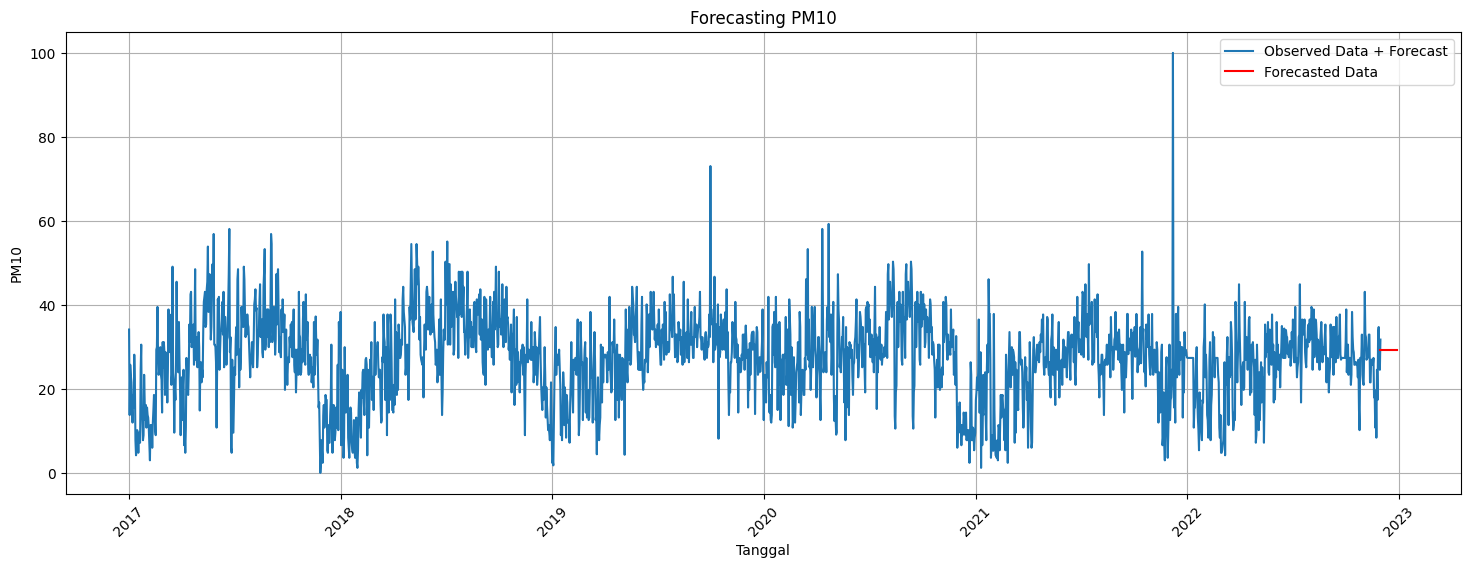

In [99]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI4['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'PM10': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI4[['Tanggal', 'PM10']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI4['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('PM10')
plt.title('Forecasting PM10')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
